# Tutorial 2

With this tutorial, we will jump into the `pytorch` Autograd functionality and further implement the Softmax Regression.

## 1. Autograd

Let

$$\begin{align}
f:\mathbb{R} &\to\mathbb{R}\\
x&\mapsto 0.7x^4+4\sin(x)-0.5x^3
\end{align}.$$

a) Plot $f(x)$ for $x \in [2.5,2.5]$.

b) Use the `pytorch` package to calculate the gradient of $f$ in $x = 2.5$. (Hint: `.backward()`)

c) Use gradient descent (with a stepsize of $0.1$ and $20$ steps) to find the minimum.

d) Modify your code of c) to log the values after each step and plot points for each step of gradient descent (Hint: `pyplot.scatter`, see [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)).

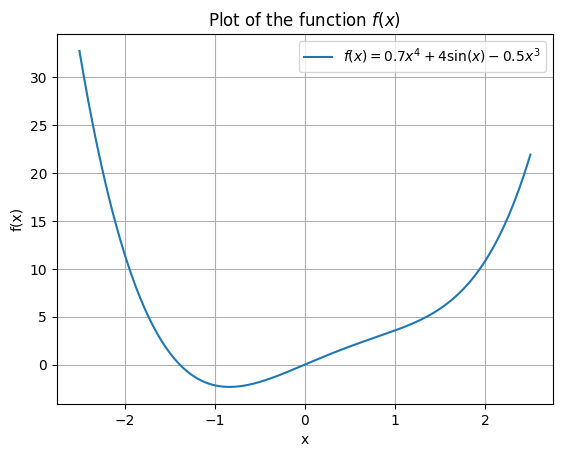

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return 0.7 * x**4 + 4 * np.sin(x) - 0.5 * x**3

# Generate x values
x = np.linspace(-2.5, 2.5, 400)
# Calculate y values
y = f(x)

# Plot the function
plt.plot(x, y, label='$f(x) = 0.7x^4 + 4\sin(x) - 0.5x^3$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function $f(x)$')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
### mit torch!
# 
x = torch.arange(-2.5,2.51, step=0.01)
f_x= 0.7*torch.pow(x,4)+4*torch.sin(x)-0.5*torch.pow(x,3)


Text(0.5, 1.0, 'Plot of the function $f(x)$')

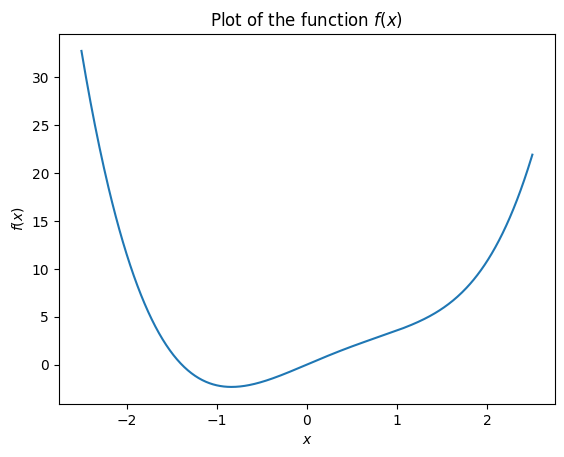

In [11]:
plt.plot(x,f_x)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Plot of the function $f(x)$")

In [24]:

# Define the function using PyTorch tensors
# f_x

# Create a tensor for x with gradient tracking enabled
x0 = torch.tensor([2.5], requires_grad=True)
F_x0 = 0.7*torch.pow(x0,4)+4*torch.sin(x0)-0.5*torch.pow(x0,3)
F_x0.backward()

In [ ]:
#zurücksetzen
# c0.grad.zero_()

x0.grad

tensor([31.1704])

In [46]:
torch.manual_seed(42)
x0 = torch.tensor([2.5], requires_grad=True)
lr = 0.05

x_steps = torch.tensor([2.5])
f_x_steps = torch.tensor([0.7*torch.pow(x0,4)+4*torch.sin(x0)-0.5*torch.pow(x0,3)])

for i in range(100):
    F_x0_loop = 0.7*torch.pow(x0,4)+4*torch.sin(x0)-0.5*torch.pow(x0,3)
    F_x0_loop.backward()
    with torch.no_grad():
        x0 -= lr * x0.grad
        x_steps = torch.cat((x_steps, x0.detach()), 0)
        f_x_steps = torch.cat((f_x_steps, torch.tensor([0.7*torch.pow(x0,4)+4*torch.sin(x0)-0.5*torch.pow(x0,3)])), 0)
    x0.grad.zero_()

print(x0)

tensor([-0.8358], requires_grad=True)


Text(0.5, 1.0, 'Plot of the function $f(x)$')

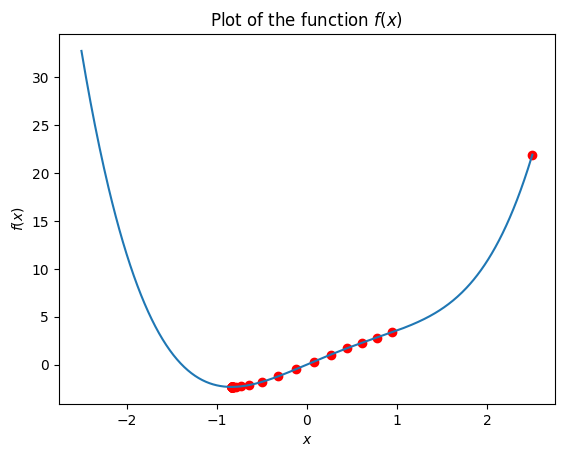

In [47]:
plt.plot(x,f_x, label="function")
plt.scatter(x_steps, f_x_steps, color='red', label="optimization steps")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Plot of the function $f(x)$")

tensor(-0.8358, requires_grad=True)


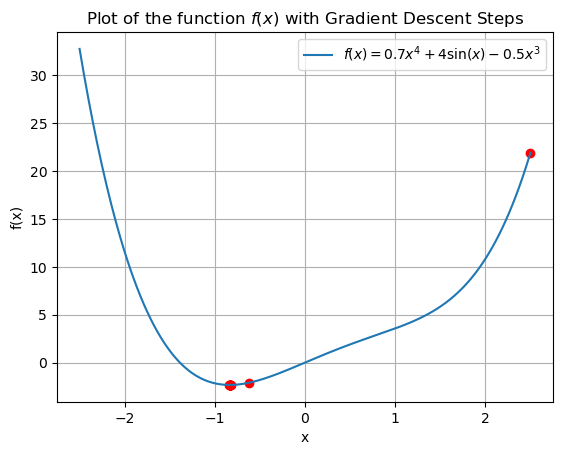

In [4]:
# Gradient descent parameters
stepsize = 0.1
steps = 20

# Initialize x_torch
x_torch = torch.tensor(2.5, requires_grad=True)

# Lists to store the values of x and f(x) at each step
x_values = []
f_values = []

# Perform gradient descent
for step in range(steps):
    # Compute the function value
    y_torch = f_torch(x_torch)
    
    # Log the values
    x_values.append(x_torch.item())
    f_values.append(y_torch.item())
    
    # Compute the gradient
    y_torch.backward()
    
    # Update x_torch
    with torch.no_grad():
        x_torch -= stepsize * x_torch.grad
    
    # Zero the gradients
    x_torch.grad.zero_()

# Print the final value of x_torch
print(x_torch)

# Plot the function
plt.plot(x, y, label='$f(x) = 0.7x^4 + 4\sin(x) - 0.5x^3$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function $f(x)$ with Gradient Descent Steps')
plt.legend()
plt.grid(True)

# Plot the gradient descent steps
plt.scatter(x_values, f_values, color='red')
plt.show()

## 2. Softmax Regression

### Dataset

At first load the [breast-cancer-dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset) from [Scikit-learn](https://scikit-learn.org/stable/index.html) and split it into training and testing set.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import torch

In [50]:
features, labels = load_breast_cancer(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

X_train= torch.tensor(X_train, dtype = torch.float)
Y_train= torch.tensor(Y_train, dtype = torch.long)
X_test= torch.tensor(X_test, dtype = torch.float)
Y_test= torch.tensor(Y_test, dtype = torch.long)

Take a look at the [documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset) of the dataset. How many observations and features are included? What are the features? How many different classes exist? etc.

* How is the benign class encoded?

In [53]:
labels.sum()
features.shape()
# -> 1 = Gutartig, 0 oder 2?! = Bösartig

TypeError: 'tuple' object is not callable

### Softmax Regression from Scratch

In a classification problem with $K$ classes, we can represent the outcome space as $\mathcal{Y}:=\{1,\dots,K\}$ (or $\{0,\dots,K-1\}$).<br>
The softmax regression model assumes that the conditional probablilty
$$ P(Y=j|X=x)= \frac{\exp(w_j^TX+b_j)}{\sum_\limits{k=1}^{K}\exp(w_k^TX+b_k)}$$
for all $j=\{1,\dots,K\}$. This is a combination of $K$ linear functions and the softmax function (normalized exponential function)
$$\begin{align}
\text{softmax}:\mathbb{R}^K&\to [0,1]^K\\
\begin{pmatrix}x_1\\ \vdots \\ x_K\end{pmatrix}&\mapsto\left(\frac{\exp(x_1)}{\sum_\limits{k=1}^{K}\exp(x_k)},\dots,\frac{\exp(x_K)}{\sum_\limits{k=1}^{K}\exp(x_k)}\right)^T.
\end{align}$$

* First, start by initializing the weights as in the lecture (use the seed $42$). How many weights do we need?
* Next, define a sofmax function, which takes in a $m\times p$ dimensional tensor and applies the softmax function for each row (the broadcasting mechanism can simplify your solutions). The result should be an $m\times p$ dimensional tensor of probabilities, which sum up to $1$.
* Use the weights and the softmax-function to define a softmax regression function, which returns the estimated conditional probablities for each class. Try the model on the first three observations of your training set.
* What would your final prediction look like, according to these probabilities (for implementation `torch.max`, see [documentation](https://pytorch.org/docs/stable/generated/torch.max.html), might be helpful)? How do the true labels look like (to compare both use `torch.eq`)?
* Evaluate the random model on your training and test set by evaluating the accuarcy (share of correct predictions).

For training, we will need another loss function (why?).

### Cross-Entropy

At first try to cross entropy loss

$$\begin{align}
l:&\mathcal{Y}_K\times[0,1]^K\to \mathbb{R}^+ \\
&(y_1,y_2)\mapsto -\sum_{j=1}^K y_{1,j} \log(y_{2,j}). \end{align}$$

Remark that the outcome is not encoded in one-hot-encoding (as in the formula). This might be helpful to implement the loss concisely. Hint:

In [ ]:
y = torch.tensor([0, 1, 0]) # three samples with corresponding classes 0,1 and 0
y_hat = torch.tensor([[0.3, 0.7], [0.5, 0.5],[0.8, 0.2]])# three predictions with corresponding probablities
y_hat[[0, 1, 0], y]

tensor([0.3000, 0.5000, 0.3000])

* Next, try to calculate the average loss on the training sample.
* Calculate the gradient to obtain the gradient of the weights and update the weights with learning rate $0.01$. Here we dont need to use stochastic gradient descent, since the sample is quite small.
* Try to predict new probabilities $\hat{y}$ for the training observations. What does go wrong? (depends on the initialization).
* What happens if you combine the softmax function and the cross entropy function (try to calculate the solution analytically, assuming that the true outcome is the $j$-th class)?<br> Use the the ["LogSumExp trick"](https://en.wikipedia.org/wiki/LogSumExp): $\log\left(\sum_j \exp(x_j)\right)\approx\max_j x_j$.
* Now try to reinitialize the weights and use the results from the previous exercise to train your regression model. (Define a function which specifies $loss(x,y)= \max_k x_k-x_j$).
* Next, evaluate the accuracy on your trained model. Do you really need to apply the `softmax` function to determine which is the most probable class?
* Is it always a good idea to return the most likely label? Especially in this example?

### Concise Implementation of Softmax Regression

In this exercise, we will implement the training using SGD.

* Next, construct a `DataLoader` (to apply SGD) for the training set by using `torch.utils.data.DataLoader` and set a seed for the random number generator. Additionally, create an `DataLoader` for the test set.
* Read through the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) of `nn.CrossEntropyLoss` to create the loss. Furhter use `nn.Sequential` and `nn.Linear` to create the model.
* Initialize the weights of your model and try to evaluate the accuracy using the `DataLoader`.
* Now train your model and save the loss and accuracy in each epoch (on the training and on the test set). Here, `reduction = 'sum' ` might be helpful for the loss.
* Try to create two plots displaying the accuracy and the losses.